In [ ]:
# Let the games begin

import copy

from TicTacToe import TicTacToe
from Agent import RandomAgent, HumanAgent
from QAgent import QLearningAgent, QPlayingAgent

params = {
    'nr_of_episodes' : 500000, # number of episodes for training
    'width' : 3, # width of the board, width = height

    'epsilon_start' : 0.15,  # initial exploration rate
    'epsilon_min' : 0.005, # minimum exploration rate
    'alpha_start' : 0.1,  # initial learning rate
    'alpha_min' : 0.1, # minimum learning rate
    'gamma' : 0.9,  # discount factor

    'switching' : False, # switch between X and O
    'debug' : False, # print debug messages

    # Parameters for QAgent
    'lazy_evaluation' : True, # use lazy evaluation
    'Q_initial_value' : 0.0, # initial Q value
    'terminal_q_updates' : True, # flag to switch between terminal and immediate Q updates

    # Parameters for DeepQAgent
    'batch_size' : 32, # batch size for deep learning
    # 'target_update_frequency' : 250, # target network update frequency
    'target_update_frequency' : 150, # target network update frequency
    'evaluation' : True, # save data for evaluation
    'double_q_learning' : False, # flag to switch on double Q-learnning
    }

width = 4
win_length = 4
nr_of_episodes = 250000
params['nr_of_episodes'] = nr_of_episodes
params['width'] = width

paramsX = copy.deepcopy(params)
paramsO = copy.deepcopy(params)
paramsX['player'] = 'X'
paramsO['player'] = 'O'

outcomes = {'X' : 0, 'O' : 0, 'D' : 0, 'I' : 0}

learning_agent1 = QLearningAgent(paramsX)
learning_agent2 = QLearningAgent(paramsO)
random_agent1 = RandomAgent(player='X', switching=False)
random_agent2 = RandomAgent(player='O', switching=False)

# game = TicTacToe(random_agent1, random_agent2, display=False, width=width, height=width, win_length=win_length)
# game = TicTacToe(learning_agent1, random_agent2, display=False, width=width, height=width, win_length=win_length)
game = TicTacToe(learning_agent1, learning_agent2, display=False, width=width, height=width, win_length=win_length)
# game = TicTacToe(random_agent1, learning_agent2, display=False, width=width, height=width, win_length=win_length)
# game = TicTacToe(random_agent1, learning_agent2, display=False, width=width, height=width, win_length=win_length)
# game1 = TicTacToe(learning_agent1, random_agent2, display=False, width=width, height=width, win_length=win_length)
# game2 = TicTacToe(random_agent1, learning_agent2, display=False, width=width, height=width, win_length=win_length)

for episode in range(nr_of_episodes):
    outcome = game.play()
    outcomes[outcome] += 1

    # outcome1 = game1.play()
    # outcome2 = game2.play()

print("Outcomes during learning:")
print(f"X wins: {outcomes['X']/nr_of_episodes}, O wins: {outcomes['O']/nr_of_episodes}, draws: {outcomes['D']/nr_of_episodes}")

Outcomes during learning:
X wins: 0.173344, O wins: 0.138148, draws: 0.688508


In [2]:
from Evaluation import QAgent_plays_against_RandomAgent, QAgent_plays_against_QAgent

Q1 = learning_agent1.Q
Q2 = learning_agent2.Q

QAgent_plays_against_RandomAgent(Q1, 'X', 2000, width=width, height=width, win_length=win_length)
QAgent_plays_against_RandomAgent(Q2, 'O', 2000, width=width, height=width, win_length=win_length)
QAgent_plays_against_QAgent(Q1, 'X', Q2, 'O', 2000, width=width, height=width, win_length=win_length)

Outcomes during playing:
X wins: 0.5855, O wins: 0.105, draws: 0.3095
Outcomes during playing:
X wins: 0.156, O wins: 0.464, draws: 0.38
Outcomes during playing:
X wins: 0.0, O wins: 0.0, draws: 1.0


Outcomes during playing:
X wins: 0.4965, O wins: 0.116, draws: 0.3875
Outcomes during playing:
X wins: 0.212, O wins: 0.458, draws: 0.33
Outcomes during playing:
X wins: 0.0, O wins: 0.0, draws: 1.0

Number of losses: 1898258
Number of action values: 1898258
Number of rewards: 2148258


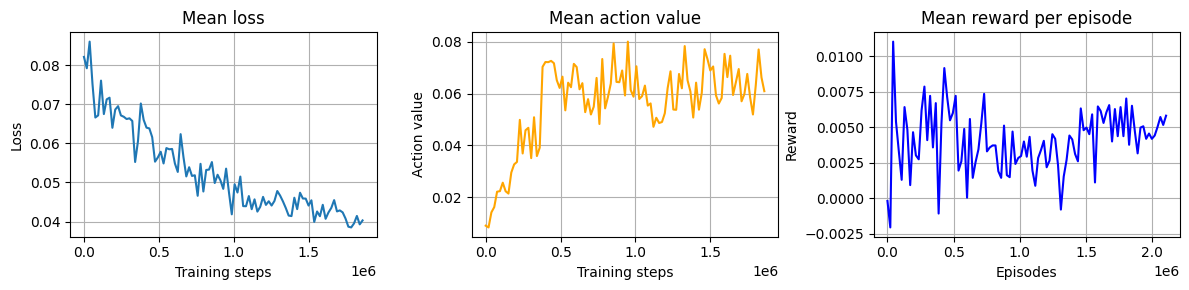

Number of losses: 1854922
Number of action values: 1854922
Number of rewards: 2104922


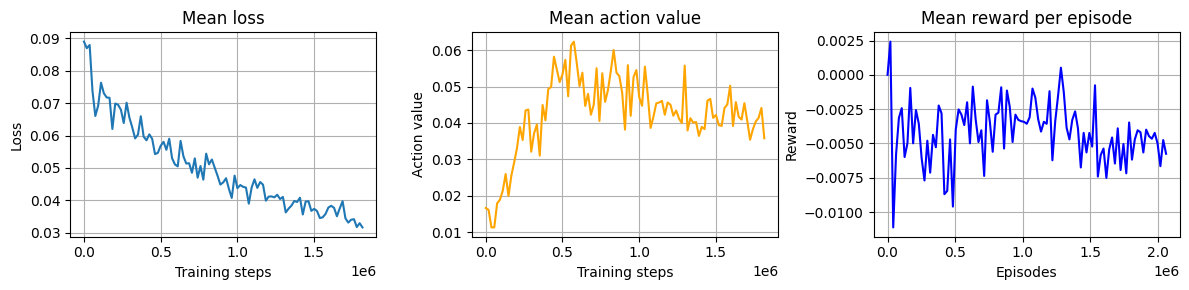

In [3]:
from Evaluation import plot_evaluation_data

plot_evaluation_data(learning_agent1)
plot_evaluation_data(learning_agent2)

In [ ]:
# import dill

# with open('SymmetricQ_optimalX.pkl', 'wb') as f:
#     dill.dump(Q1.get(), f)

# with open('SymmetricQ_optimalO.pkl', 'wb') as f:
#     dill.dump(Q2.get(), f)

# with open('TotallySymmetricQ_optimalX.pkl', 'wb') as f:
#     dill.dump(Q1.get(), f)

# with open('TotallySymmetricQ_optimalO.pkl', 'wb') as f:
#     dill.dump(Q2.get(), f)

In [ ]:
import numpy as np

from playGame import get_empty_positions

def displayQ(Q, board):
    actions = get_empty_positions(board)  # Assume this function returns indices of empty positions
    Qs = {action: f"{Q.get(tuple(board), action):.2f}" for action in actions}  # Get Q-values, default to 0
    board_size = int(len(board) ** 0.5)  # Assume square board

    # Create a new board layout with Q-values embedded
    Qboard = list(board)
    for action, value in Qs.items():
        Qboard[action] = value  # Replace empty spots with Q-values

    cell_width = 5  # Padding for centering

    # Format and display the board
    for i in range(board_size):
        row = Qboard[i * board_size:(i + 1) * board_size]
        formatted_row = " | ".join(str(cell).center(cell_width) for cell in row)
        print(formatted_row)
        if i < board_size - 1:
            print("-" * (board_size * cell_width + (board_size - 1) * 3))  # Line separator   

    print("\n")

def display_history(Q, history):
    for i in range(len(history)):
        board, action = history[i]
        displayQ(Q, board)

Q1 = learning_agent.Q
historyX = paramsX['histories']
Q2 = learning_agent2.Q
historyO = paramsO['histories']
for i in range(min((len(historyX), len(historyO)))):
    board, action = historyO[i]
    displayQ(Q2, board)
    board, action = historyX[i]
    displayQ(Q1, board)

board, action = historyO[len(historyO) - 1]
displayQ(Q1, board)

# if max(len(historyX), len(historyO)) == len(historyX):
#     board, action = historyX[len(historyX) - 1]
#     displayQ(Q1, board)
# else:
#     board, action = historyO[len(historyO) - 1]
#     displayQ(Q2, board)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def extract_values(dictionary):
    """Extract all values from a potentially nested dictionary."""
    values = []
    for key, value in dictionary.items():
        if isinstance(value, dict):  # If the value is a dictionary, recurse
            values.extend(extract_values(value))
        else:
            values.append(value)
    return values

def evaluate_and_plot_Q(learning_agent, player):
    Q = learning_agent.Q
    qMatrix = Q.get()
    qValues = extract_values(qMatrix)
    print(qValues)
    print(f"Total number of elements in Q for player {player}: {len(qValues)}")
    
    mean_q = np.mean(qValues)
    median_q = np.median(qValues)
    std_q = np.std(qValues)
    min_q = np.min(qValues)
    max_q = np.max(qValues)

    print(f"Q-value Statistics for player {player}:")
    print(f"Mean: {mean_q}")
    print(f"Median: {median_q}")
    print(f"Standard Deviation: {std_q}")
    print(f"Minimum: {min_q}")
    print(f"Maximum: {max_q}")

    plt.figure(figsize=(10, 6))
    plt.hist(qValues, bins=20, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of Q-values for player {player}")
    plt.xlabel("Q-value")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

evaluate_and_plot_Q(learning_agent1, 'X')
evaluate_and_plot_Q(learning_agent2, 'O')

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Generate sample data (Replace with your actual numerical data)
# Example: A hypothetical 9-variable function f(x1, ..., x9) = x1^2 + x2*sin(x3) + exp(x4)*x5 - cos(x6)*x7 + x8*x9
n_samples = 10000  # Number of samples
inputs = np.random.uniform(-10, 10, size=(n_samples, 9))  # 9-dimensional input

# Define the target function
targets = (
    inputs[:, 0] ** 2
    + inputs[:, 1] * np.sin(inputs[:, 2])
    + np.exp(inputs[:, 3]) * inputs[:, 4]
    - np.cos(inputs[:, 5]) * inputs[:, 6]
    + inputs[:, 7] * inputs[:, 8]
)

# Step 2: Define the Neural Network using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(9,)),  # Hidden layer 1
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer 3
    tf.keras.layers.Dense(1)  # Output layer
])
model.summary()
# Compile the model with MSE loss and Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='mse')

# Step 3: Train the model
history = model.fit(inputs, targets, epochs=100, batch_size=32, verbose=1)

# Step 4: Plot training loss
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Step 5: Evaluate the model and visualize predictions
# Generate test data for evaluation
test_inputs = np.random.uniform(-10, 10, size=(1000, 9))
test_targets = (
    test_inputs[:, 0] ** 2
    + test_inputs[:, 1] * np.sin(test_inputs[:, 2])
    + np.exp(test_inputs[:, 3]) * test_inputs[:, 4]
    - np.cos(test_inputs[:, 5]) * test_inputs[:, 6]
    + test_inputs[:, 7] * test_inputs[:, 8]
)

# Predict with the model
predictions = model.predict(test_inputs)

# Scatter plot of true vs predicted values
plt.scatter(test_targets, predictions, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()
